### Import package

In [124]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC


### load dataset

In [13]:
data = pd.read_csv("E:\\House predicting price project\\mail_data.csv")

In [16]:
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [18]:
 df = data.where(pd.notnull(data), " ")

In [20]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### inspect data

In [25]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [29]:
df.shape

(5572, 2)

### Turn the spam/ham into numerical value 

In [31]:
df.loc[df['Category'] ==  'spam' , 'Category',] = 0
df.loc[df['Category'] ==  'ham' , 'Category',] = 1

In [33]:
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


### split the data into train and test

In [37]:
X = df['Message']
Y = df['Category']

In [39]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [41]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [43]:
X_train, X_test , Y_train , Y_test = train_test_split(X, Y, test_size =0.2, random_state = 3)

In [45]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [47]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [61]:
feature_extraction = TfidfVectorizer(min_df =1 , stop_words='english', max_df=0.7 , lowercase = True)
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

In [68]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

### Train Naive Bayes model


In [70]:
nb_model = MultinomialNB()
nb_model.fit(X_train_feature, Y_train)

MultinomialNB()

In [72]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


### Predict using the model

In [118]:
y_pred_nb = nb_model.predict(X_test_feature)

In [95]:
email_ham = ["hey can we meet today"]
email_vec = feature_extraction.transform(email_ham)
y_pred = nb_model.predict(email_vec)
y_pred

array([1])

In [87]:
cv = CountVectorizer()

### Evaluate Naive Bayes model


In [120]:
print("Naive Bayes Model Evaluation:")
print("Accuracy:", accuracy_score(Y_test, y_pred_nb))

Naive Bayes Model Evaluation:
Accuracy: 0.9730941704035875


In [126]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_nb))
print("Classification Report:\n", classification_report(Y_test, y_pred_nb))

Confusion Matrix:
 [[125  30]
 [  0 960]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       155
           1       0.97      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### Plot confusion matrix for Naive Bayes


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

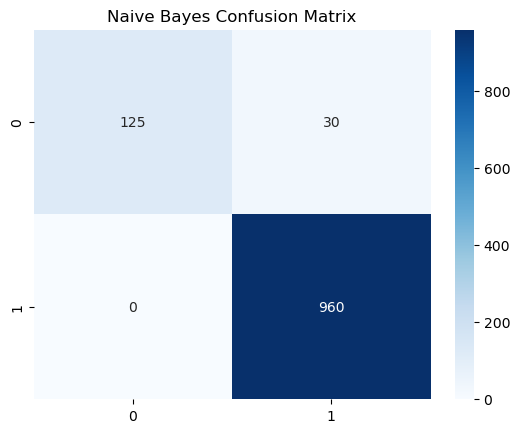

In [140]:
sns.heatmap(confusion_matrix(Y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()



In [167]:
import pickle


In [169]:
pickle.dump(nb_model, open("naive_bayes_model.pkl","wb"))

In [177]:
pickle.dump(TfidfVectorizer, open("vectorizer.pkl", "wb"))

In [181]:
clf = pickle.load(open("naive_bayes_model.pkl", "rb"))

In [183]:
clf

MultinomialNB()

In [191]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(TfidfVectorizer, f)

In [193]:
with open('vectorizer.pkl', 'rb') as f:
    TfidfVectorizer = pickle.load(f)